<a href="https://colab.research.google.com/github/mahenoor22/skin-disease-build/blob/main/data_mining_project/LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
df1 = pd.read_csv("Train.csv")
df1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0.0,2.0,BHK,1300.236407,1.0,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0.0,2.0,BHK,1275.000000,1.0,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0.0,2.0,BHK,933.159722,1.0,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1.0,2.0,BHK,929.921143,1.0,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0.0,2.0,BHK,999.009247,0.0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
df1.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [ ]:
df1['BHK_NO'].unique()

array([ 2.,  3.,  1.,  4.,  5.,  6., 12.,  8., 20., 10.,  7., nan,  9.,
       13., 17., 15., 11.])

# **BHK_NO can be used for clustering**
It makes a group of values depending on the number of bedrooms 

In [ ]:
df1.groupby('BHK_NO')['BHK_NO'].agg('count')

BHK_NO
1.0      3574
2.0     13324
3.0     10546
4.0      1723
5.0       190
6.0        51
7.0        11
8.0        10
9.0         3
10.0        4
11.0        1
12.0        3
13.0        1
15.0        4
17.0        1
20.0        4
Name: BHK_NO, dtype: int64

## **Dropping UNDER_CONSTRUCTION column beacuse it is repeated copy of 'READY_TO_MOVE'**

In [ ]:
df2=df1.drop(['UNDER_CONSTRUCTION'],axis='columns')
df2.head()

,POSTED_BY,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0.0,2.0,BHK,1300.236407,1.0,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0.0,2.0,BHK,1275.000000,1.0,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0.0,2.0,BHK,933.159722,1.0,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,1.0,2.0,BHK,929.921143,1.0,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,0.0,2.0,BHK,999.009247,0.0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## **CHECKING MISSING VALUES**

In [ ]:
df2.isnull().sum()

POSTED_BY                0
RERA                     1
BHK_NO                   1
BHK_OR_RK                2
SQUARE_FT                1
READY_TO_MOVE            1
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

## **Dropping null value rows**

In [ ]:
df3=df2.dropna()
df3.isnull().sum()

POSTED_BY                0
RERA                     0
BHK_NO                   0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [ ]:
df4=df3.copy()

In [ ]:
#FEATURE ENGINEERING
df4['PRICE_PER_SQFT']=df3['TARGET(PRICE_IN_LACS)']*100000/df3['SQUARE_FT']
df4.head()

## **counting the total number of values for each address**

In [ ]:
len(df4.ADDRESS.unique())

6899

## **DIMENSIONALITY REDUCTION**

## **CHECKING THE LOCATION STATS OF EACH ADDRESS**

In [ ]:
df4.ADDRESS=df4.ADDRESS.apply(lambda x:x.strip())
location_stats=df4.groupby('ADDRESS')['ADDRESS'].agg('count').sort_values(ascending=False)
location_stats

ADDRESS
Zirakpur,Chandigarh                                509
Whitefield,Bangalore                               230
Raj Nagar Extension,Ghaziabad                      215
Sector-137 Noida,Noida                             139
New Town,Kolkata                                   131
                                                  ... 
Opp reliance market, near ram lila maidan,Surat      1
Opp. EVP Theme Park, Kuthumbakam,Chennai             1
Opp. Philia Hospital, Tembhode Rd,Palghar            1
Opposite Civil Hospital,Roorkee                      1
, panvel,Mumbai                                      1
Name: ADDRESS, Length: 6899, dtype: int64

In [ ]:
location_stats_less_than_10=location_stats[location_stats<=10]

## **CONVERTING VALUE OF ADDRESS TO 'OTHER' WHERE THE LOCATION STATS < 10**

In [ ]:
df4.ADDRESS=df4.ADDRESS.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.ADDRESS.unique())

574

In [ ]:
df4.head(10)

,POSTED_BY,RERA,BHK_NO,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),PRICE_PER_SQFT
0,Owner,0.0,2.0,BHK,1300.236407,1.0,1,other,12.969910,77.597960,55.0,4229.999999
1,Dealer,0.0,2.0,BHK,1275.000000,1.0,1,other,12.274538,76.644605,51.0,4000.000000
2,Owner,0.0,2.0,BHK,933.159722,1.0,1,"Jigani,Bangalore",12.778033,77.632191,43.0,4608.000000
3,Owner,1.0,2.0,BHK,929.921143,1.0,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,6721.000000
4,Dealer,0.0,2.0,BHK,999.009247,0.0,1,"New Town,Kolkata",22.592200,88.484911,60.5,6056.000000
5,Owner,0.0,3.0,BHK,1250.000000,1.0,1,other,10.033280,76.282571,42.0,3360.000000
6,Dealer,0.0,3.0,BHK,1495.053957,1.0,1,other,26.916347,75.795600,66.5,4448.000000
7,Owner,1.0,3.0,BHK,1181.012946,1.0,1,"Kharar,Mohali",30.740000,76.650000,52.0,4402.999999
8,Dealer,1.0,2.0,BHK,1040.000000,1.0,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6,4000.000000
9,Owner,1.0,2.0,BHK,879.120879,1.0,1,"Chromepet,Chennai",12.951610,80.140970,36.0,4095.000000


# **Let's check if for a given location how does the BHK and RK property prices look like**

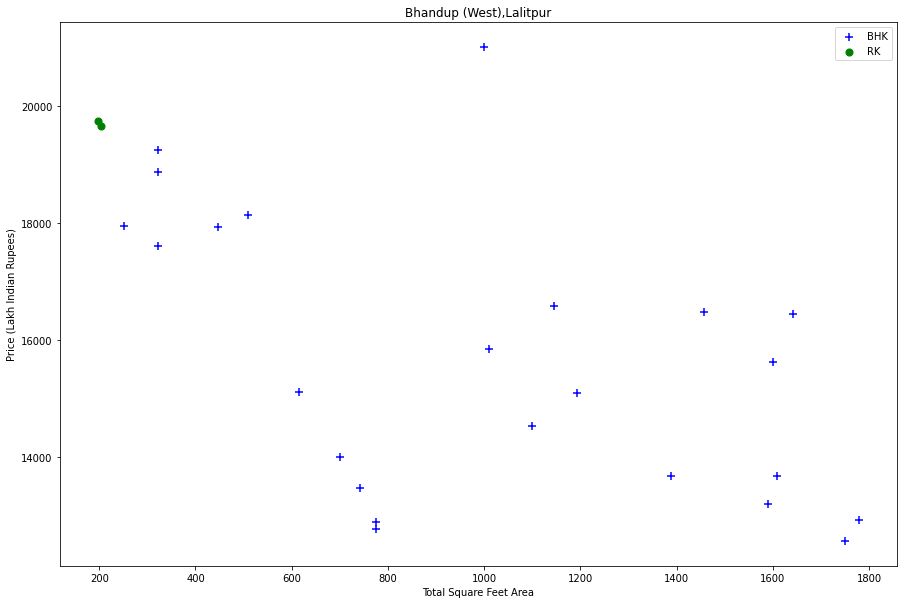

In [120]:
def plot_scatter_chart(df,ADDRESS):
    bhk2 = df[(df.ADDRESS==ADDRESS) & (df.BHK_OR_RK=='BHK')]
    bhk3 = df[(df.ADDRESS==ADDRESS) & (df.BHK_OR_RK=='RK')]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.SQUARE_FT,bhk2.PRICE_PER_SQFT,marker='+',color='blue',label='BHK', s=50)
    plt.scatter(bhk3.SQUARE_FT,bhk3.PRICE_PER_SQFT, color='green',label='RK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(ADDRESS)
    plt.legend()
    
plot_scatter_chart(df4,"Bhandup (West),Lalitpur")
